<a href="https://colab.research.google.com/github/Pedro98nt/Projeto-Bioinformatica/blob/main/Editando_GENES_Bioinform%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Em bioinformática, o formato FASTA é um formato baseado em texto para representar tanto sequencias de nucleótidos quanto sequencias de peptídeos, no qual os nucleotídeos ou aminoácidos são representados usando códigos de uma única letra.[1][2] O formato também permite sequências de nomes e comentários precedendo as sequências. O formato se origina do FASTA, pacote de software, mas agora se tornou um padrão na área de bioinformática. A simplicidade do formato FASTA torna mais fácil manipular e analisar sequências usando ferramentas de processamento de texto e linguagens de script como Python, Ruby, e Perl.


Uma sequência em formato FASTA começa com uma descrição de uma única linha, seguida por linhas de dados em sequência.

A linha de descrição se distingue a partir da sequência dos dados por um símbolo maior-que (">") na primeira coluna. A palavra que segue o símbolo ">" é o identificador da sequência, e o resto da linha é a descrição (ambos são opcionais). Não deve haver nenhum espaço entre o ">" e a primeira letra do identificador. Recomenda-se que todas as linhas do texto sejam mais curtas do que 80 caracteres. A sequência termina se uma outra linha de partida com um ">" aparece, o que indica o início de outra sequência.

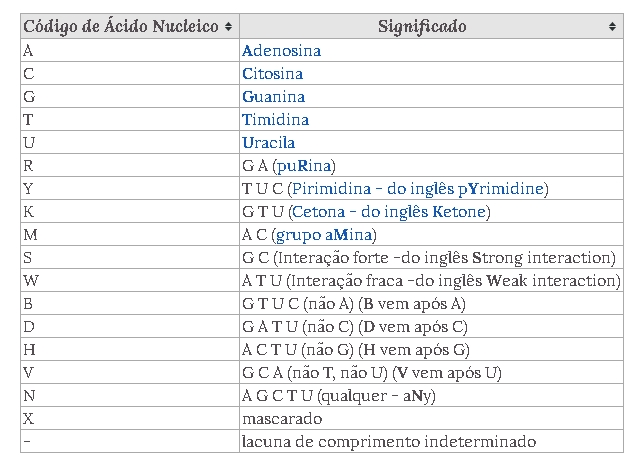

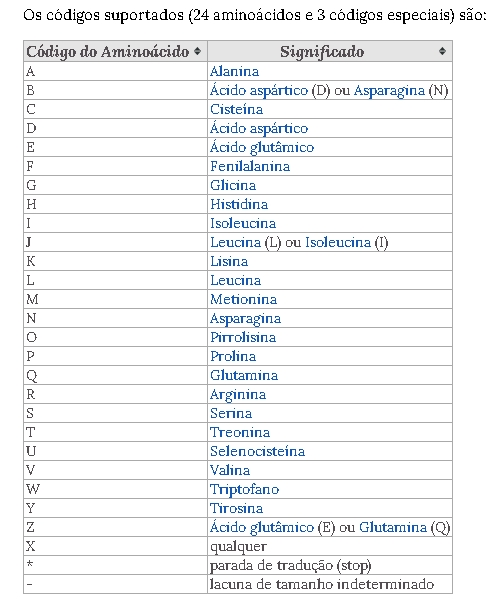

# 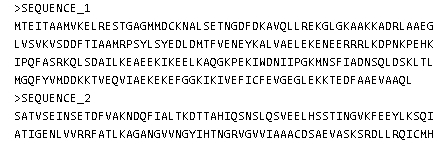

In [ ]:
# Input
# ---aaattcc---cccc--
# aactgtgactgcatgcatgactgactg
# Output
# aaattcc---cccc
# tgtgactgcatgcatgactgac

In [ ]:
def contar_no_comeco(sequencia):
    '''Conta os - no começo da sequência'''

    tracos = 0
    for c in sequencia:
        if c == '-':
            tracos = tracos + 1
        else:
            break
    return tracos

In [ ]:
def contar_no_final(sequencia):
  return contar_no_comeco(reversed(sequencia))

In [ ]:
def editar_sequencias(seq1, seq2):
    _inicio = contar_no_comeco(seq1)
    _final = contar_no_final(seq1)
    # se o final for 0, precisamos ajustar

In [ ]:
 # Sim, podemos retornar duas coisas em Python
    return (seq1[_inicio:-_final if _final != 0 else len(seq1)], 
            seq2[_inicio:-_final if _final != 0 else len(seq2)])

In [ ]:
def teste():
    '''Este é o teste'''

In [ ]:
seq1 = '---aaattcc---cccc--'
seq2 = 'aactgtgactgcatgcatgactgactg'

In [ ]:
  ed1, ed2 = editar_sequencias(seq1, seq2)
    print(ed1)
    print(ed2)

In [ ]:
def encontrar_gb(linhas):
    '''Econtra o índice onda há ">gb" '''

    indice = 0
    for l in linhas:
        if '>gb' in l:
            break
        indice = indice + 1
    return indice

if __name__ == "__main__":
    # abre o arquivo para leitura
    teste()

In [ ]:
with open('/content/DENV1-X-gb_A75711.fasta.aln') as fasta:
        conteudo = fasta.read()
        # dividimos o conteúdo em uma lista nas quebra de linhas 
        # equivalente ao readlines()
        linhas = conteudo.split('\n')
        # print(linhas)
        cabecalho1 = linhas[0]
        indice = encontrar_gb(linhas)

        cabecalho2 = linhas[indice]
        # reconstruímos as sequências a partir da lista
        sequencia1 = ''.join(linhas[1:indice])
        sequencia2 = ''.join(linhas[indice+1:])

       

In [ ]:
 # abre um novo arquivo para escrita
        with open(os.path.join('output', 'resultado.fasta'), 'w') as res:
            # recebemos as duas sequências editadas retornadas
            editada1, editada2 = editar_sequencias(sequencia1, sequencia2)
            # escreve sequencia editada
            res.write(cabecalho1 + '\n')
            res.write(editada1 + '\n')
            res.write(cabecalho2 + '\n')
            res.write(editada2)